In [140]:
%pip install jupyter pandas sympy
%pip install beautifulsoup4 lxml html5lib
%pip install pint

In [141]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

In [142]:
from modsim import *

This simulation about task management of volunteers .There is 20 total task.Among them 4 is done and 16 is pending

In [143]:
task=State(done=4,pending=16)
task.done

4

In [144]:
task.pending

16

In [145]:
show(task)

,state
done,4
pending,16


In [146]:
print(task)

done        4
pending    16
Name: state, dtype: int64


In [147]:
task.done=6
task.pending=14

In [148]:
show(task)

,state
done,6
pending,14


In [149]:
task.pending-=1
task.done+=1


In [150]:
show(task)

,state
done,7
pending,13


In [151]:
def task_done():
  task.pending-=1
  task.done+=1
  print("One task done")
task_done()

One task done


In [152]:
show(task)

,state
done,8
pending,12


In [153]:
def task_add():
  task.pending+=1
  print("New task added")

task_add()

New task added


In [154]:
show(task)

,state
done,8
pending,13


In [155]:
# 50% chance of adding a new task
if flip(0.5):
  task_add()
# 30% chance of completing a pending task if there are any
if flip(0.3):
  task_done()

New task added


In [156]:
def task_allocation(p1,p2):
  if flip(p1):
    task_add()
  if flip(p2):
    task_done()


In [157]:
task_allocation(0.5,0.3)

New task added
One task done


In [158]:
show(task)


,state
done,9
pending,14


In [159]:
task

done        9
pending    14
Name: state, dtype: int64

In [160]:
for i in range(7):
  print(i)
  task_done()

0
One task done
1
One task done
2
One task done
3
One task done
4
One task done
5
One task done
6
One task done


In [161]:
show(task)

,state
done,16
pending,7


In [162]:
for i in range(7):
  print(i)
  task_add()


0
New task added
1
New task added
2
New task added
3
New task added
4
New task added
5
New task added
6
New task added


In [163]:
show(task)

,state
done,16
pending,14


In [164]:
results=TimeSeries()

In [165]:
results[0]=task.done

In [166]:
for i in range(3):
    print(i)
    task_allocation(0.4, 0.3)
    results[i+1] = task.done

0
New task added
One task done
1
2


In [167]:
show(results)

,Quantity
Time,
0,16
1,17
2,17
3,17


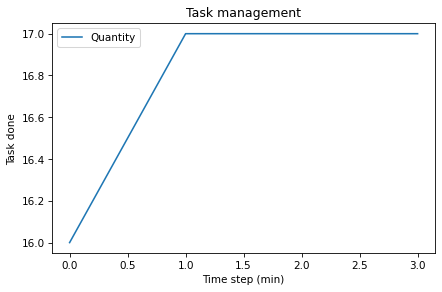

In [168]:
results.plot()

decorate(title='Task management',
         xlabel='Time step (min)',
         ylabel='Task done')

In [169]:
def run_simulation(p1,p2,num_steps):
  results= TimeSeries()
  results[0]=task.done
  for i in range(num_steps):
    task_allocation(0.4, 0.3)
    results[i+1] = task.done
  results.plot()
  decorate(title='Task management',
         xlabel='Time step (min)',
         ylabel='Task done')

New task added
New task added
One task done
New task added
New task added
New task added
One task done
New task added
New task added
One task done
New task added
One task done
New task added
New task added
One task done
One task done
New task added
One task done
One task done
One task done


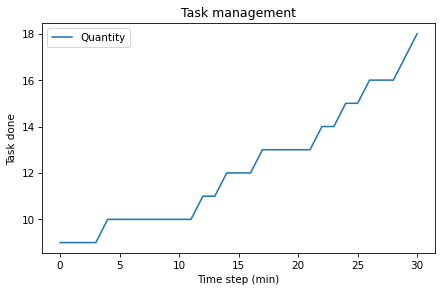

In [170]:
task=State(done=9,pending=11)
run_simulation(0.3,0.2,30)

<Axes: xlabel='Time'>

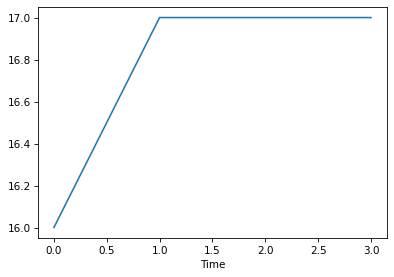

In [171]:
results.plot()